In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.lines import Line2D
import numpy as np
import dateutil
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired',
                            1092: 'impaired', 1102: 'impaired', 1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

In [6]:
df = fr_filt

pca_data = df.drop(df.filter(regex='Blank|Water|QC1|QC2').columns, axis=1).filter(regex='.raw').T
pca_data

Unique Identifier,unknown_679.05463_0.536,unknown_641.1087_0.537,unknown_951.15973_0.541,unknown_329.03067_0.542,unknown_969.13147_0.544,unknown_623.13641_0.546,unknown_291.08359_0.551,unknown_352.99652_0.553,unknown_247.09372_0.554,unknown_605.14441_0.555,...,unknown_1027.93848_19.865,TG_58:2_960.89709_19.876,unknown_1001.92316_19.882,TG_18:0_18:0_18:0_908.86542_19.885,unknown_948.89648_20.144,unknown_897.82532_20.148,unknown_974.9118_20.163,unknown_593.58716_20.175,unknown_871.80945_20.196,unknown_1003.93829_20.435
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),9.974970e+06,4.024286e+07,1.411587e+07,1.100528e+08,9.488360e+06,1.644000e+08,1.703304e+09,5.969281e+06,9.140128e+07,2.452885e+07,...,4.038564e+05,1.644001e+06,1.052319e+06,2.095905e+06,8.970427e+05,1.500998e+06,5.875953e+05,1.593412e+06,9.364211e+05,5.219911e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),1.692144e+07,5.397037e+07,3.166872e+07,6.605294e+07,1.661334e+07,1.645235e+08,4.115227e+09,4.976731e+06,1.347382e+08,2.976628e+07,...,3.036407e+05,1.300542e+06,7.029812e+05,1.577690e+06,3.532246e+05,2.481922e+05,3.533019e+05,1.838481e+05,7.539398e+04,2.595208e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210329_9wk_FBG.raw (F5),1.258949e+07,3.543749e+07,1.871277e+07,1.567150e+08,1.098442e+07,1.478147e+08,1.640477e+09,4.850035e+06,8.767777e+07,2.493104e+07,...,4.509356e+05,1.373760e+06,9.115551e+05,2.724300e+06,1.191289e+06,1.670474e+06,5.673557e+05,1.810744e+06,1.233463e+06,3.951451e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),2.247304e+07,3.485691e+07,9.434457e+06,2.032554e+08,5.525663e+06,7.311034e+07,8.826880e+08,7.252525e+06,4.946537e+07,5.015935e+06,...,3.319396e+05,8.290029e+05,7.775092e+05,1.569481e+06,5.059093e+05,3.143235e+05,4.740242e+05,2.156390e+05,9.233474e+04,3.623042e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210405_10wk_FBG.raw (F7),1.197038e+07,1.866727e+07,1.050696e+07,1.272289e+08,6.225248e+06,6.196267e+07,7.334885e+08,4.828790e+06,3.846423e+07,6.977642e+06,...,5.698491e+04,7.512638e+04,2.233480e+05,1.073555e+06,2.498006e+05,7.775475e+05,2.021644e+05,8.938883e+05,6.364182e+05,1.051087e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210408_10wk_RBG.raw (F8),8.914997e+06,2.250254e+07,1.747228e+07,1.598825e+08,8.111235e+06,7.880792e+07,1.060676e+09,2.265318e+06,6.451276e+07,1.305277e+07,...,2.324918e+05,6.450554e+05,5.491153e+05,1.212189e+06,3.556847e+05,1.517734e+05,2.918566e+05,1.325956e+05,3.870549e+04,2.329650e+05
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),1.042187e+07,2.518790e+07,1.392568e+07,1.177918e+08,6.859485e+06,8.005670e+07,1.326608e+09,4.217873e+06,7.913940e+07,1.333927e+07,...,1.030005e+05,1.470772e+05,2.416869e+05,7.455546e+05,1.941945e+05,6.675371e+05,1.687284e+05,6.193117e+05,3.933187e+05,8.145056e+04
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210325_8wk_RBG.raw (F10),5.531159e+06,1.093399e+07,9.971310e+06,1.261985e+08,4.907544e+06,3.960936e+07,1.021326e+09,4.373527e+06,6.222520e+07,1.045091e+07,...,7.676132e+05,2.215319e+06,1.555777e+06,2.108953e+06,7.923259e+05,5.230112e+05,4.122617e+05,4.497607e+05,9.084311e+04,6.388685e+05
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG.raw (F14),1.070997e+07,5.986366e+06,1.680713e+07,1.560455e+08,9.316513e+06,4.760641e+07,1.099753e+09,5.156230e+06,7.491744e+07,1.325642e+07,...,4.412553e+05,1.280183e+06,9.236193e+05,1.024316e+06,5.722040e+05,2.796698e+05,4.560872e+05,2.240424e+05,5.671033e+04,3.681080e+05
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210405_10wk_FBG.raw (F15),1.029364e+07,2.018931e+07,8.493427e+06,1.480377e+08,5.353262e+06,6.404818e+07,8.965819e+08,5.450682e+06,4.846362e+07,8.097528e+06,...,2.487544e+05,5.774058e+05,6.201026e+05,1.375310e+06,7.157662e+05,1.017263e+06,4.651279e+05,9.247636e+05,4.920931e+05,2.237121e+05


,pc1,pc2,bg_type,rat_label
0,-18.189626,16.983296,FBG,1060.0
1,2.965187,-11.236983,RBG,1060.0
2,-10.972515,13.099351,FBG,1060.0
3,16.708373,-17.148930,RBG,1060.0
4,-17.006890,2.656109,FBG,1060.0
5,2.656182,-12.553877,RBG,1060.0
6,-21.472754,14.376832,FBG,1062.0
7,22.451110,1.176104,RBG,1062.0
8,12.435211,-11.304756,RBG,1062.0
9,-6.592327,9.872484,FBG,1062.0


Text(-0.08, 1.03, 'A')

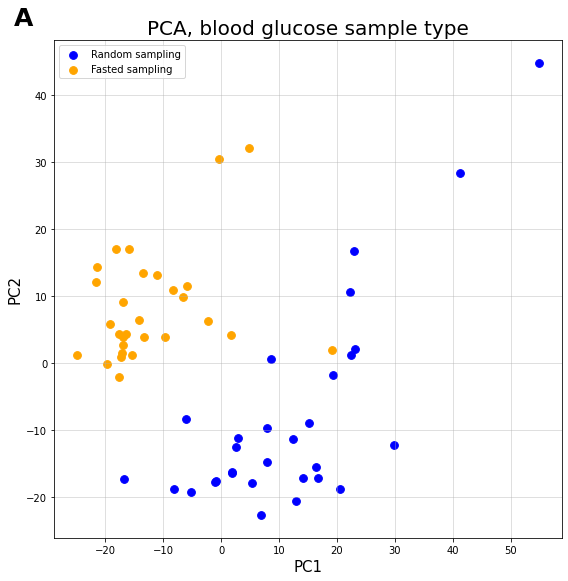

In [9]:
df = fr_filt

pca_data = df.drop(df.filter(regex='Blank|Water|QC1|QC2').columns, axis=1).filter(regex='.raw').T

# Populate rat_label and bg_type columns in PCA df from file_grouping
# (pd.merge() is similar to inner join in SQL) 
pca_data = pd.merge(pca_data, 
                    file_grouping[['fr_name', 'rat_label', 'bg_type']],
                    how='inner', 
                    left_on=pca_data.index, 
                    right_on='fr_name',)\
                    .set_index(pca_data.index).drop('fr_name', axis=1)

# display(pca_data)

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is important for PCA
scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label'], axis=1))
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)
# display(fitted)
# restore the bg and rat labels into the df
pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label']]], axis=1)
display(pca_data)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, blood glucose sample type', fontsize=20)
targets = ['RBG', 'FBG']
target_colors = ['blue', 'orange']
markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

for target, color in zip(targets, target_colors):
    scatter_points = pca_data[(pca_data['bg_type'] == target)] 
    ax.scatter(scatter_points['pc1'],
               scatter_points['pc2'],
               c = color,
               cmap='viridis',
               s = 60)
ax.legend(['Random sampling', 'Fasted sampling'],)
ax.grid(alpha=0.5)
plt.tight_layout()

ax.text(-0.08, 1.03, "A", transform=ax.transAxes, fontsize=25, weight='bold')

# plt.savefig(r'..\reports\collaborator reports\preliminary 20210812\figures\PCA colored by BG.png')

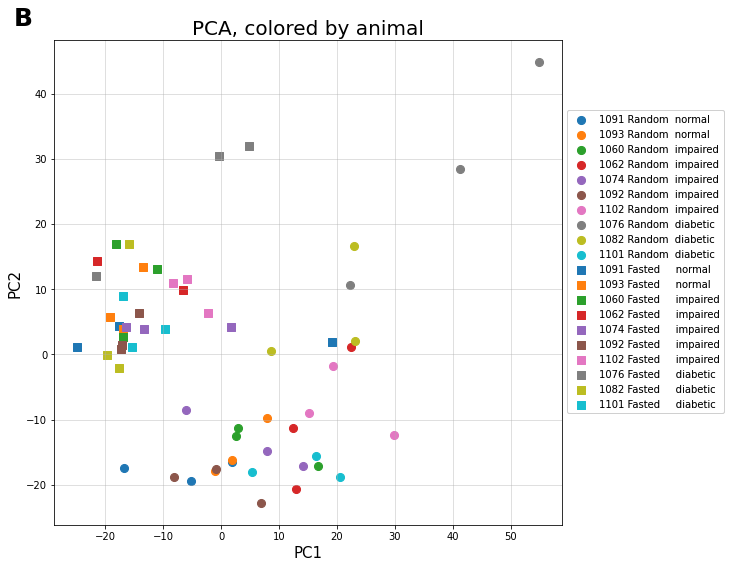

In [23]:
df = fr_filt

pca_data = df.drop(df.filter(regex='Blank|Water|QC1|QC2').columns, axis=1).filter(regex='.raw').T

# Populate rat_label and bg_type columns in PCA df from file_grouping
# (pd.merge() is similar to inner join in SQL) 
pca_data = pd.merge(pca_data, 
                    file_grouping[['fr_name', 'rat_label', 'bg_type']],
                    how='inner', 
                    left_on=pca_data.index, 
                    right_on='fr_name',)\
                    .set_index(pca_data.index).drop('fr_name', axis=1)

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is a little important for PCA
scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label'], axis=1))
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)

# restore the bg and rat labels into the df
pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label']]], axis=1)

# display(pca_data)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, colored by animal', fontsize = 20)
targets = ['RBG', 'FBG']
markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

handles = []

for target, marker in zip(targets, markers):
    for label, color in zip(animals_used, colors):
        scatter_points = pca_data[(pca_data['bg_type'] == target) & (pca_data['rat_label'] == label)]
#         print(scatter_points)
        handle = ax.scatter(scatter_points['pc1'],
                            scatter_points['pc2'],
                            c = color,
#                             cmap='viridis',
                            marker=marker,
                            s = (75 if marker == 's' else 65),
                            )
    
        # define the text label for the data handle for the legend:
        gluc_tol = animal_phenotypes[animal_phenotypes['animal'] == label]['glucose_tolerance'].values[0]
        handle.set_label(str(label) + ' ' + ('Random ' if target == 'RBG' else 'Fasted    ') + ' ' + gluc_tol)
        handles.append(handle)
        
# ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
plt.tight_layout()

legend_labels = []
for animal in animals_used:
    animal_data = animal_phenotypes[animal_phenotypes['animal'] == animal]
    gluc_tol = animal_data['glucose_tolerance'].values[0]
    label = str(animal) + ' ' + gluc_tol
    legend_labels.append(label)
    
# Sort legend_labels based on normal/impaired/diabetic substring
# legend_labels.sort(key = lambda x: x.split(' ')[1])

handles, labels = ax.get_legend_handles_labels()

# print(handles, labels)
legend = ax.legend(handles, labels, loc=(1.01, 0.23))

# legend = ax.legend(labels=legend_labels, loc=(1.01, 0.7))
ax.add_artist(legend)
# ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=1, color='black', label='FBG'),
#                    mpatches.Circle(xy=(0, 0), color='black', label='RBG')])

ax.text(-0.08, 1.03, "B", transform=ax.transAxes, fontsize=25, weight='bold')
# ax.text(1.072, 0.87, "Animal, feeding, glucose tolerance", transform=ax.transAxes, fontsize=9)

plt.tight_layout()

plt.savefig(r'..\reports\collaborator reports\preliminary 20210812\figures\PCA colored by animal.png', 
            bbox_inches='tight')  

In [14]:
df.drop(df.filter(regex='Blank|Water|QC1|QC2').columns, axis=1).filter(regex='.raw').T

Unique Identifier,unknown_679.05463_0.536,unknown_641.1087_0.537,unknown_951.15973_0.541,unknown_329.03067_0.542,unknown_969.13147_0.544,unknown_623.13641_0.546,unknown_291.08359_0.551,unknown_352.99652_0.553,unknown_247.09372_0.554,unknown_605.14441_0.555,...,unknown_1027.93848_19.865,TG_58:2_960.89709_19.876,unknown_1001.92316_19.882,TG_18:0_18:0_18:0_908.86542_19.885,unknown_948.89648_20.144,unknown_897.82532_20.148,unknown_974.9118_20.163,unknown_593.58716_20.175,unknown_871.80945_20.196,unknown_1003.93829_20.435
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),9.974970e+06,4.024286e+07,1.411587e+07,1.100528e+08,9.488360e+06,1.644000e+08,1.703304e+09,5.969281e+06,9.140128e+07,2.452885e+07,...,4.038564e+05,1.644001e+06,1.052319e+06,2.095905e+06,8.970427e+05,1.500998e+06,5.875953e+05,1.593412e+06,9.364211e+05,5.219911e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),1.692144e+07,5.397037e+07,3.166872e+07,6.605294e+07,1.661334e+07,1.645235e+08,4.115227e+09,4.976731e+06,1.347382e+08,2.976628e+07,...,3.036407e+05,1.300542e+06,7.029812e+05,1.577690e+06,3.532246e+05,2.481922e+05,3.533019e+05,1.838481e+05,7.539398e+04,2.595208e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210329_9wk_FBG.raw (F5),1.258949e+07,3.543749e+07,1.871277e+07,1.567150e+08,1.098442e+07,1.478147e+08,1.640477e+09,4.850035e+06,8.767777e+07,2.493104e+07,...,4.509356e+05,1.373760e+06,9.115551e+05,2.724300e+06,1.191289e+06,1.670474e+06,5.673557e+05,1.810744e+06,1.233463e+06,3.951451e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),2.247304e+07,3.485691e+07,9.434457e+06,2.032554e+08,5.525663e+06,7.311034e+07,8.826880e+08,7.252525e+06,4.946537e+07,5.015935e+06,...,3.319396e+05,8.290029e+05,7.775092e+05,1.569481e+06,5.059093e+05,3.143235e+05,4.740242e+05,2.156390e+05,9.233474e+04,3.623042e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210405_10wk_FBG.raw (F7),1.197038e+07,1.866727e+07,1.050696e+07,1.272289e+08,6.225248e+06,6.196267e+07,7.334885e+08,4.828790e+06,3.846423e+07,6.977642e+06,...,5.698491e+04,7.512638e+04,2.233480e+05,1.073555e+06,2.498006e+05,7.775475e+05,2.021644e+05,8.938883e+05,6.364182e+05,1.051087e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210408_10wk_RBG.raw (F8),8.914997e+06,2.250254e+07,1.747228e+07,1.598825e+08,8.111235e+06,7.880792e+07,1.060676e+09,2.265318e+06,6.451276e+07,1.305277e+07,...,2.324918e+05,6.450554e+05,5.491153e+05,1.212189e+06,3.556847e+05,1.517734e+05,2.918566e+05,1.325956e+05,3.870549e+04,2.329650e+05
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),1.042187e+07,2.518790e+07,1.392568e+07,1.177918e+08,6.859485e+06,8.005670e+07,1.326608e+09,4.217873e+06,7.913940e+07,1.333927e+07,...,1.030005e+05,1.470772e+05,2.416869e+05,7.455546e+05,1.941945e+05,6.675371e+05,1.687284e+05,6.193117e+05,3.933187e+05,8.145056e+04
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210325_8wk_RBG.raw (F10),5.531159e+06,1.093399e+07,9.971310e+06,1.261985e+08,4.907544e+06,3.960936e+07,1.021326e+09,4.373527e+06,6.222520e+07,1.045091e+07,...,7.676132e+05,2.215319e+06,1.555777e+06,2.108953e+06,7.923259e+05,5.230112e+05,4.122617e+05,4.497607e+05,9.084311e+04,6.388685e+05
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG.raw (F14),1.070997e+07,5.986366e+06,1.680713e+07,1.560455e+08,9.316513e+06,4.760641e+07,1.099753e+09,5.156230e+06,7.491744e+07,1.325642e+07,...,4.412553e+05,1.280183e+06,9.236193e+05,1.024316e+06,5.722040e+05,2.796698e+05,4.560872e+05,2.240424e+05,5.671033e+04,3.681080e+05
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210405_10wk_FBG.raw (F15),1.029364e+07,2.018931e+07,8.493427e+06,1.480377e+08,5.353262e+06,6.404818e+07,8.965819e+08,5.450682e+06,4.846362e+07,8.097528e+06,...,2.487544e+05,5.774058e+05,6.201026e+05,1.375310e+06,7.157662e+05,1.017263e+06,4.651279e+05,9.247636e+05,4.920931e+05,2.237121e+05


Text(-0.08, 1.03, 'C')

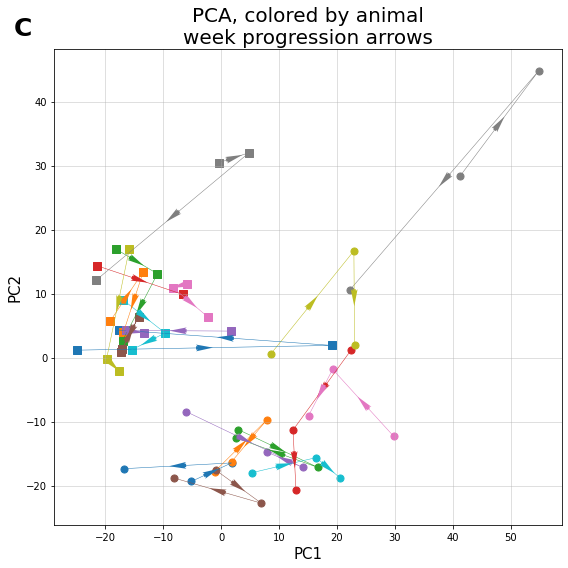

In [47]:
df = fr_filt

pca_data = df.drop(df.filter(regex='Blank|Water|QC1|QC2').columns, axis=1).filter(regex='.raw').T

# Populate rat_label and bg_type columns in PCA df from file_grouping
# (pd.merge() is similar to inner join in SQL) 
pca_data = pd.merge(pca_data, 
                    file_grouping[['fr_name', 'rat_label', 'bg_type']],
                    how='inner', 
                    left_on=pca_data.index, 
                    right_on='fr_name',)\
                    .set_index(pca_data.index).drop('fr_name', axis=1)

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is a little important for PCA
scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label'], axis=1))
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)

# restore the bg and rat labels into the df
pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label']]], axis=1)

# display(pca_data)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, colored by animal\nweek progression arrows', fontsize = 20)
targets = ['RBG', 'FBG']
markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

for target, marker in zip(targets, markers):
    for label, color in zip(animals_used, colors):
        scatter_points = pca_data[(pca_data['bg_type'] == target) & (pca_data['rat_label'] == label)]
#         print(scatter_points)
        ax.scatter(scatter_points['pc1'],
                   scatter_points['pc2'],
                   c = color,
#                    cmap='viridis',
                   marker=marker,
                   s = (60 if marker == 's' else 50),
                   )
        # Adding arrows connecting each mouse from week 8 to 9 to 10 using ax.quiver()
        # https://stackoverflow.com/questions/58342419/show-direction-arrows-in-a-scatterplot
        
        x = scatter_points['pc1'].values
        y = scatter_points['pc2'].values
        
        x_diff = np.diff(x)
        y_diff = np.diff(y)
        
        pos_x = x[:-1] + x_diff/2
        pos_y = y[:-1] + y_diff/2
                
        norm = np.sqrt(x_diff**2 + y_diff**2)
        
        ax.quiver(pos_x, pos_y, x_diff/norm, y_diff/norm, angles='xy', zorder=5, pivot='mid', 
                  color=color,
                  linewidth=0.01,
#                   linestyle='-',
                  scale=30,
                  headwidth=2,
                 )
        plt.plot(x, y, linewidth=0.5)
    
# ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
plt.tight_layout()

ax.text(-0.08, 1.03, "C", transform=ax.transAxes, fontsize=25, weight='bold')

# plt.savefig(r'..\reports\collaborator reports\preliminary 20210812\figures\PCA colored by animal arrows.png')  

### Response message from Huishi
In figure 3, I see that week 8 to 9 to 10 doesn't seem to be unidirectional. Perhaps, you can have the average, i.e. one dot per animal. That way, we can see if the fasted blood data is generally a mirror image of the non-fasted blood data. For example, the diabetic animals are on the top right and the normal animals are on the bottom left. Both the fasted and non-fasted data are in consensus.


- Average Weeks 8,9,10 among each animal, separated by F vs R


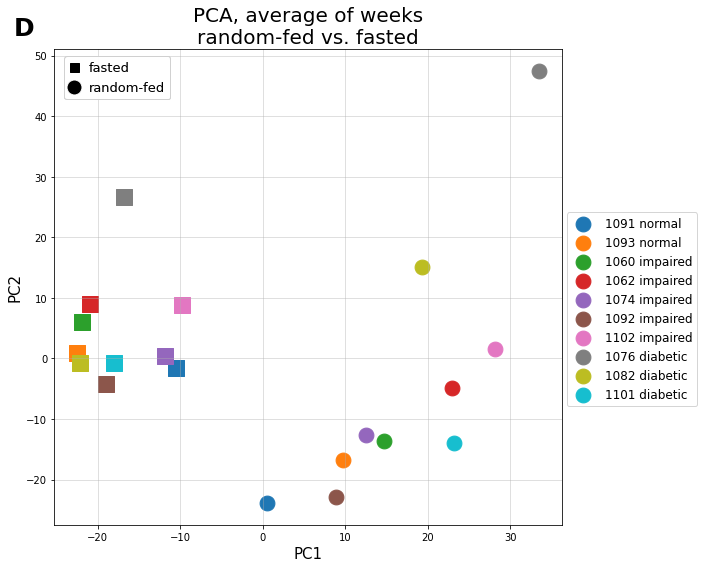

In [10]:
df = fr_filt

animal_avg_df = pd.DataFrame()

for tolerance_type in bg_dict:
    for rat_label in bg_dict[tolerance_type]:
        for bg_type in ['RBG', 'FBG']:
            cols = file_grouping[  (file_grouping['rat_label'] == rat_label)\
                                 & (file_grouping['bg_type'] == bg_type)\
                                 & (file_grouping['quant_file'] == True )]['fr_name']
            animal_avg_df[f'{tolerance_type}_{rat_label}_{bg_type}'] = df[cols].mean(axis=1)
            
pca_data = animal_avg_df.T
pca_data['gluc_tol'] = pca_data.index.str.split('_').str[0]
pca_data['rat_label'] = pca_data.index.str.split('_').str[1]
pca_data['bg_type'] = pca_data.index.str.split('_').str[2]

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is important for PCA
scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label', 'gluc_tol'], axis=1))
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)

# restore the bg and rat labels into the df
pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label', 'gluc_tol']]], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, average of weeks\nrandom-fed vs. fasted', fontsize = 20)

markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

handles = []


for rat_label, color in zip(animals_used, colors):
    for bg_type, marker in zip(['RBG', 'FBG'], markers):
        tolerance_type = animal_to_tolerance_dict[rat_label]
        edge_color = None
        if tolerance_type == 'diabetic':
            edge_color = 'lightgray'
        elif tolerance_type == 'impaired':
            edge_color = 'darkgray'
        else: 
            edge_color = 'black'

        scatter_points = pca_data[(pca_data['gluc_tol'] == tolerance_type) & \
                                  (pca_data['rat_label'] == str(rat_label)) & \
                                  (pca_data['bg_type'] == bg_type)]
        handle = ax.scatter(scatter_points['pc1'],
                            scatter_points['pc2'],
                            c = color,
                            marker=marker,
#                             edgecolors=edge_color,
#                             linewidths=3,              # linewidths is stroke size of marker outline
                            s = (250 if marker == 's' else 220),
                            )
#         # Annotate the plot with letter for Diabetic, Normal, Impaired
#         ax.annotate(tolerance_type[0].upper(), 
#                     xy=(scatter_points['pc1']-0.5, scatter_points['pc2']-0.7), 
#                     fontsize=20,
#                     color='black')
    
        # define the text label for the data handle for the legend:
#         gluc_tol = animal_phenotypes[animal_phenotypes['animal'] == rat_label]['glucose_tolerance'].values[0]
        handle.set_label(str(rat_label) + ' ' + tolerance_type )
        handles.append(handle)
        
# ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
plt.tight_layout()

legend_labels = []
for animal in animals_used:
    animal_data = animal_phenotypes[animal_phenotypes['animal'] == animal]
    gluc_tol = animal_data['glucose_tolerance'].values[0]
    label = str(animal) + ' ' + gluc_tol
    legend_labels.append(label)
    
# Sort legend_labels based on normal/impaired/diabetic substring
# legend_labels.sort(key = lambda x: x.split(' ')[1])

handles, labels = ax.get_legend_handles_labels()

# print(handles, labels)
legend = ax.legend(handles[::2], labels[::2], loc=(1.01, 0.25), fontsize=12)

# legend = ax.legend(labels=legend_labels, loc=(1.01, 0.7))

legend2 = ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=1, color='black', label='fasted', ),
                   Line2D([0], [0], marker='o', color='white', label='random-fed', 
                          markerfacecolor='black', markersize=15)], loc=(0.02, 0.895), fontsize=13, handlelength=0.7)
ax.add_artist(legend)
ax.add_artist(legend2)

# ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=1, color='black', label='FBG'),
#                    mpatches.Circle(xy=(0, 0), color='black', label='RBG')], loc=(1.01, 0.98))

ax.text(-0.08, 1.03, "D", transform=ax.transAxes, fontsize=25, weight='bold')

plt.tight_layout()


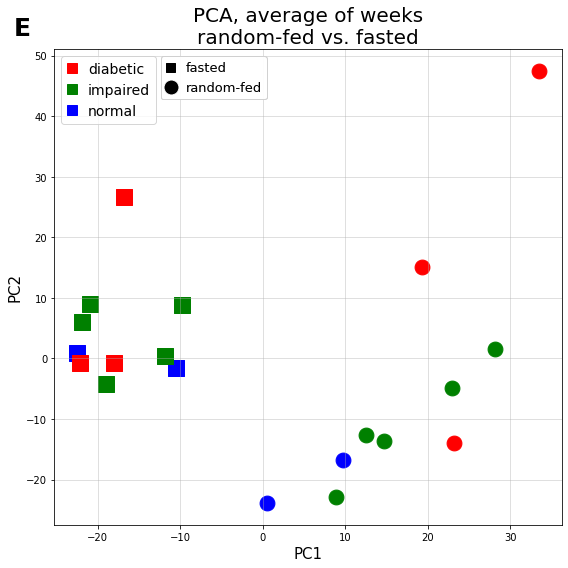

In [182]:
df = fr_filt

animal_avg_df = pd.DataFrame()

for tolerance_type in bg_dict:
    for rat_label in bg_dict[tolerance_type]:
        for bg_type in ['RBG', 'FBG']:
            cols = file_grouping[  (file_grouping['rat_label'] == rat_label)\
                                 & (file_grouping['bg_type'] == bg_type)\
                                 & (file_grouping['quant_file'] == True )]['fr_name']
            animal_avg_df[f'{tolerance_type}_{rat_label}_{bg_type}'] = df[cols].mean(axis=1)
            
pca_data = animal_avg_df.T
pca_data['gluc_tol'] = pca_data.index.str.split('_').str[0]
pca_data['rat_label'] = pca_data.index.str.split('_').str[1]
pca_data['bg_type'] = pca_data.index.str.split('_').str[2]

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is important for PCA
scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label', 'gluc_tol'], axis=1))
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)

# restore the bg and rat labels into the df
pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label', 'gluc_tol']]], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, average of weeks\nrandom-fed vs. fasted', fontsize = 20)

markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

handles = []


for rat_label, color in zip(animals_used, colors):
    for bg_type, marker in zip(['RBG', 'FBG'], markers):
        tolerance_type = animal_to_tolerance_dict[rat_label]
        gluc_tol_color = None
        if tolerance_type == 'diabetic':
            gluc_tol_color = 'red'
        elif tolerance_type == 'impaired':
            gluc_tol_color = 'green'
        else: 
            gluc_tol_color = 'blue'
    
        scatter_points = pca_data[(pca_data['gluc_tol'] == tolerance_type) & \
                                  (pca_data['rat_label'] == str(rat_label)) & \
                                  (pca_data['bg_type'] == bg_type)]
        handle = ax.scatter(scatter_points['pc1'],
                            scatter_points['pc2'],
                            c = gluc_tol_color,
                            marker=marker,
#                             edgecolors=edge_color,
#                             linewidths=3,              # linewidths is stroke size of marker outline
                            s = (250 if marker == 's' else 220),
                            )
#         # Annotate the plot with letter for Diabetic, Normal, Impaired
#         ax.annotate(tolerance_type[0].upper(), 
#                     xy=(scatter_points['pc1']-0.5, scatter_points['pc2']-0.7), 
#                     fontsize=20,
#                     color='black')
    
        # define the text label for the data handle for the legend:
#         gluc_tol = animal_phenotypes[animal_phenotypes['animal'] == rat_label]['glucose_tolerance'].values[0]
        handle.set_label(str(rat_label) + ' ' + tolerance_type + ' ' + ('Random' if bg_type == 'RBG' else 'Fasted'))
        handles.append(handle)
        
# ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
plt.tight_layout()

legend_labels = []
for animal in animals_used:
    animal_data = animal_phenotypes[animal_phenotypes['animal'] == animal]
    gluc_tol = animal_data['glucose_tolerance'].values[0]
    label = str(animal) + ' ' + gluc_tol
    legend_labels.append(label)
    
# Sort legend_labels based on normal/impaired/diabetic substring
# legend_labels.sort(key = lambda x: x.split(' ')[1])

# handles, labels = ax.get_legend_handles_labels()

# print(handles, labels)
# legend = ax.legend(handles, labels, loc=(1.01, 0.18), fontsize=12)

# legend = ax.legend(labels=legend_labels, loc=(1.01, 0.7))

legend = ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=3, color='red', label='diabetic'),
                   mpatches.Rectangle(xy=(0, 0), width=1, height=3, color='green', label='impaired'),
                   mpatches.Rectangle(xy=(0, 0), width=1, height=3, color='blue', label='normal'),], fontsize=14, handlelength=0.7)

legend2 = ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=1, color='black', label='fasted', ),
                   Line2D([0], [0], marker='o', color='white', label='random-fed', 
                          markerfacecolor='black', markersize=15)], loc=(0.21, 0.895), fontsize=13, handlelength=0.7)
ax.add_artist(legend)
ax.add_artist(legend2)


ax.text(-0.08, 1.03, "E", transform=ax.transAxes, fontsize=25, weight='bold')

plt.tight_layout()


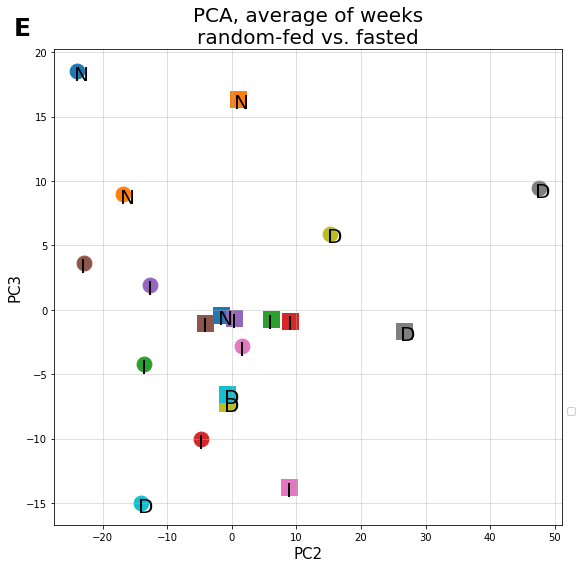

In [132]:
##### PC2 AND PC3

df = fr_filt

animal_avg_df = pd.DataFrame()

for tolerance_type in bg_dict:
    for rat_label in bg_dict[tolerance_type]:
        for bg_type in ['RBG', 'FBG']:
            cols = file_grouping[  (file_grouping['rat_label'] == rat_label)\
                                 & (file_grouping['bg_type'] == bg_type)\
                                 & (file_grouping['quant_file'] == True )]['fr_name']
            animal_avg_df[f'{tolerance_type}_{rat_label}_{bg_type}'] = df[cols].mean(axis=1)
            
pca_data = animal_avg_df.T
pca_data['gluc_tol'] = pca_data.index.str.split('_').str[0]
pca_data['rat_label'] = pca_data.index.str.split('_').str[1]
pca_data['bg_type'] = pca_data.index.str.split('_').str[2]

n_components = 3
pca = PCA(n_components=n_components)

# Standard scaler is important for PCA
scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label', 'gluc_tol'], axis=1))
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)

# restore the bg and rat labels into the df
pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label', 'gluc_tol']]], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC2', fontsize = 15)
ax.set_ylabel('PC3', fontsize = 15)
ax.set_title('PCA, average of weeks\nrandom-fed vs. fasted', fontsize = 20)

markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

handles = []


for rat_label, color in zip(animals_used, colors):
    for bg_type, marker in zip(['RBG', 'FBG'], markers):
        tolerance_type = animal_to_tolerance_dict[rat_label]
        edge_color = None
        if tolerance_type == 'diabetic':
            edge_color = 'lightgray'
        elif tolerance_type == 'impaired':
            edge_color = 'darkgray'
        else: 
            edge_color = 'black'

        scatter_points = pca_data[(pca_data['gluc_tol'] == tolerance_type) & \
                                  (pca_data['rat_label'] == str(rat_label)) & \
                                  (pca_data['bg_type'] == bg_type)]
        handle = ax.scatter(scatter_points['pc2'],
                            scatter_points['pc3'],
                            c = color,
                            marker=marker,
#                             edgecolors=edge_color,
#                             linewidths=3,              # linewidths is stroke size of marker outline
                            s = (250 if marker == 's' else 220),
                            )
        ax.annotate(tolerance_type[0].upper(), 
                    xy=(scatter_points['pc2']-0.5, scatter_points['pc3']-0.7), 
                    fontsize=20,
                    color='black')
    
#         # define the text label for the data handle for the legend:
#         gluc_tol = animal_phenotypes[animal_phenotypes['animal'] == label]['glucose_tolerance'].values[0]
#         handle.set_label(str(label) + ' ' + ('Random ' if target == 'RBG' else 'Fasted    ') + ' ' + gluc_tol)
#         handles.append(handle)
        
# ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
plt.tight_layout()

legend_labels = []
for animal in animals_used:
    animal_data = animal_phenotypes[animal_phenotypes['animal'] == animal]
    gluc_tol = animal_data['glucose_tolerance'].values[0]
    label = str(animal) + ' ' + gluc_tol
    legend_labels.append(label)
    
# Sort legend_labels based on normal/impaired/diabetic substring
# legend_labels.sort(key = lambda x: x.split(' ')[1])

handles, labels = ax.get_legend_handles_labels()

# print(handles, labels)
legend = ax.legend(handles, labels, loc=(1.01, 0.23))

# legend = ax.legend(labels=legend_labels, loc=(1.01, 0.7))
ax.add_artist(legend)
# ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=1, color='black', label='FBG'),
#                    mpatches.Circle(xy=(0, 0), color='black', label='RBG')])

ax.text(-0.08, 1.03, "E", transform=ax.transAxes, fontsize=25, weight='bold')

plt.tight_layout()


In [68]:
list(zip(bg_dict.keys(), ['b', 'r', 'g']))

[('diabetic', 'b'), ('impaired', 'r'), ('normal', 'g')]

In [72]:
for thing in bg_dict.keys():
    print(list(zip(bg_dict[thing], colors)))

[(1076, 'tab:blue'), (1082, 'tab:orange'), (1101, 'tab:green')]
[(1060, 'tab:blue'), (1062, 'tab:orange'), (1074, 'tab:green'), (1092, 'tab:red'), (1102, 'tab:purple')]
[(1091, 'tab:blue'), (1093, 'tab:orange')]


In [62]:
pca_data

,pc1,pc2,bg_type,rat_label,gluc_tol
0,33.426418,47.467531,RBG,1076,diabetic
1,-16.849399,26.585455,FBG,1076,diabetic
2,19.278319,15.157399,RBG,1082,diabetic
3,-22.109306,-0.763090,FBG,1082,diabetic
4,23.236072,-14.003120,RBG,1101,diabetic
5,-18.040524,-0.755962,FBG,1101,diabetic
6,14.740896,-13.594822,RBG,1060,impaired
7,-21.876549,6.006633,FBG,1060,impaired
8,22.983193,-4.799891,RBG,1062,impaired
9,-20.907137,8.993286,FBG,1062,impaired


In [64]:
pca_data[(pca_data['bg_type'] == 'FBG') & (pca_data['rat_label'] == str(1101)) & \
         (pca_data['gluc_tol'] == 'diabetic')]

,pc1,pc2,bg_type,rat_label,gluc_tol
5,-18.040524,-0.755962,FBG,1101,diabetic


           pc1     Identification
781   0.054090       PC 18:2_19:0
425   0.053830       PC 18:2_22:6
805   0.053222       PC 16:0_18:0
836   0.052782            PC 40:3
815   0.052490       PC 18:1_18:0
...        ...                ...
196  -0.028276            AC 18:0
967  -0.028826  TG 20:5_22:6_22:6
1000 -0.033249  TG 18:2_20:5_20:5
154  -0.036121            AC 18:1
143  -0.037360            AC 16:0

[324 rows x 2 columns]
(324, 2)


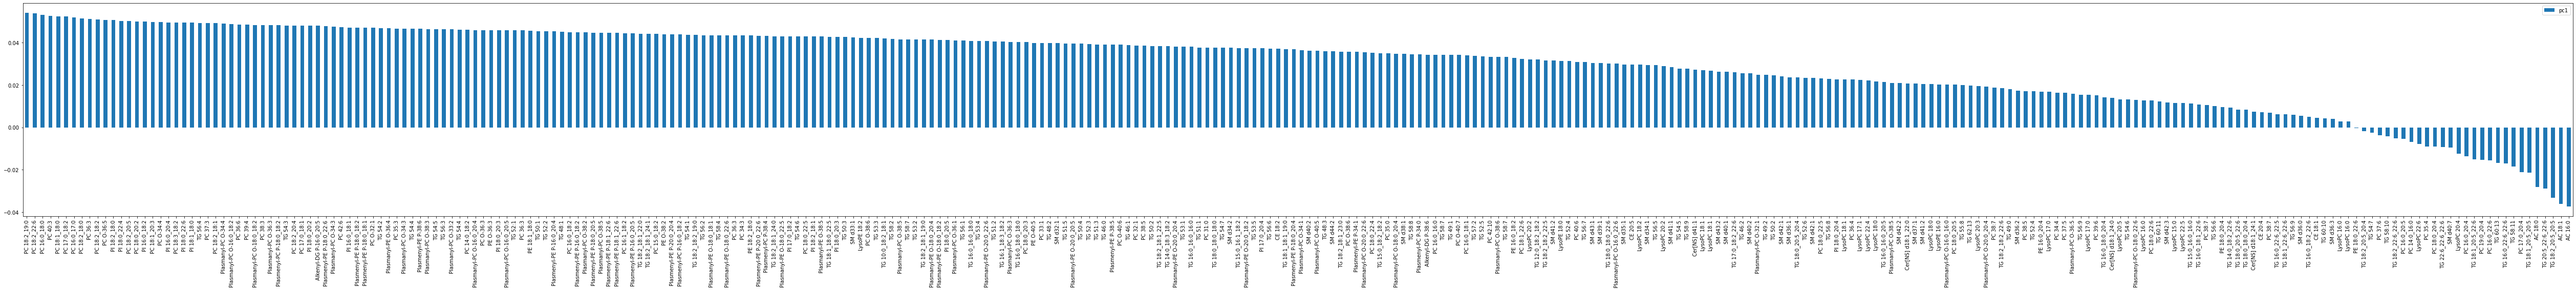

In [20]:
loadings = pd.DataFrame(pca.components_.T, columns=['pc1', 'pc2'], index=fr_norm.index)
loadings = loadings.merge(fr_raw, how='inner', left_index=True, right_index=True)
loadings = loadings[loadings['Identification'].notnull()].sort_values('pc1', ascending=False)[['pc1', 'Identification']]

print(loadings)

loadings.iloc[:].plot.bar()
print(loadings.shape)
# print(loadings['Identification'].values)
plt.xticks(list(range(0, loadings.shape[0])), loadings['Identification'].values, rotation=90);

plt.gcf().set_size_inches(70, 8)

plt.tight_layout()

plt.savefig(r'..\reports\figures\pc1 loadings.png')

<BarContainer object of 324 artists>

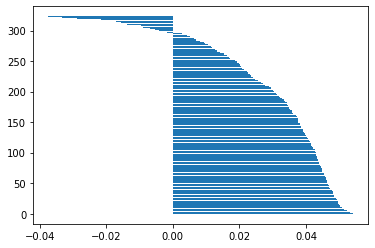

In [22]:
plt.barh(list(range(0,loadings.shape[0])), loadings['pc1'].values)

No handles with labels found to put in legend.


(324, 3)


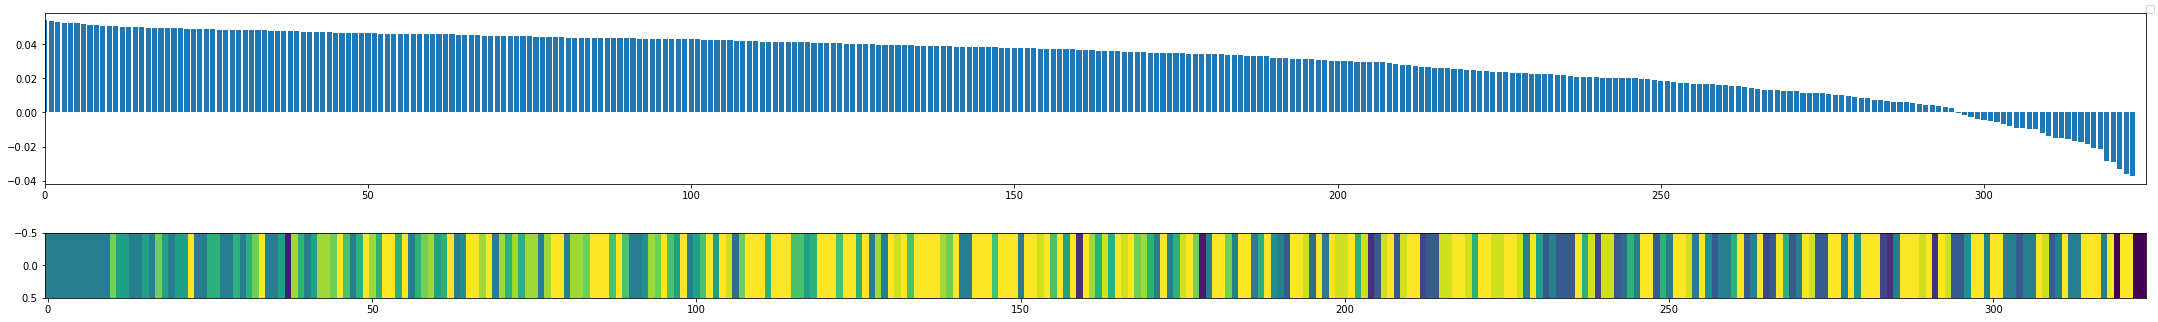

In [25]:
# Generate mapping from lipid class to a number for plt.imshow()
unique_classes = sorted(list(fr_norm['Lipid Class'].unique()))
lip_class_num_map = {}
for i, lip_class in enumerate(unique_classes):
    lip_class_num_map[lip_class] = i
    
    

loadings = pd.DataFrame(pca.components_.T, columns=['pc1', 'pc2'], index=fr_norm.index)
loadings = loadings.merge(fr_raw, how='inner', left_index=True, right_index=True)
loadings = loadings[loadings['Identification'].notnull()].sort_values('pc1', ascending=False)[['pc1', 'Identification', 'Lipid Class']]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(30, 5))

ax1.bar(list(range(0, loadings.shape[0])), loadings['pc1'].values)
ax1.set_xlim(0, 325)

# Create list to plot in .imshow()
values = []
for lip_class in loadings[loadings['Lipid Class'] != 'unknown']['Lipid Class']:
    values.append(lip_class_num_map[lip_class])

# bounds = np.arange(-0.5, len(values), 1)
# norm = colors.BoundaryNorm(boundaries=bounds,)
  
    
ims = ax2.imshow([values], aspect=10)

# fig.colorbar(ims, ax=ax2, orientation='horizontal')

fig.legend()

# ax1.barh(loadings['pc1'])

# loadings.iloc[:].plot.bar()
print(loadings.shape)
# print(loadings['Identification'].values)
# plt.xticks(list(range(0, loadings.shape[0])), loadings['Identification'].values, rotation=90);

plt.tight_layout()

# plt.savefig(r'..\reports\figures\pc1 loadings.png')

### Color the loadings plot by Lipid Class and Lipid Superclass to show by color which classes drive the difference between FBG and RBG

##### Colorbar doesn't work
##### Use heatmap instead

In [318]:
unique_classes = sorted(list(fr_norm['Lipid Class'].unique()))

lip_class_num_map = {}

for i, lip_class in enumerate(unique_classes):
    lip_class_num_map[lip_class] = i

In [327]:
fr_norm[fr_norm['Lipid Class'] != 'unknown']['Lipid Class']

92      LysoPC
95      LysoPC
100     LysoPC
106     LysoPC
108     LysoPC
         ...  
1465        TG
1468        TG
1469        TG
1471        TG
1473        TG
Name: Lipid Class, Length: 324, dtype: object

In [19]:
values = []
print(values)

for lip_class in fr_norm[fr_norm['Lipid Class'] != 'unknown']['Lipid Class']:
#     print(lip_class)
    values.append(lip_class_num_map[lip_class])
    
print(values)
plt.imshow([values], aspect=10)
plt.gcf().set_size_inches(40, 5)
    

[]


NameError: name 'lip_class_num_map' is not defined

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['pc1', 'pc2'], index=fr_norm.index)
loadings = loadings.merge(fr_raw, how='inner', left_index=True, right_index=True)
loadings[loadings['Identification'].notnull()].sort_values('pc1', ascending=False)['pc1'].plot.bar()
plt.xticks([], [])

In [219]:
fr_raw

,Retention Time (min),Quant Ion,Polarity,Area (max),Identification,Lipid Class,Features Found,20210729_AJ_Toh_RatBloodGlucose_ExtractionBlank.raw (F1),20210729_AJ_Toh_RatBloodGlucose_SolventBlank.raw (F2),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),...,20210729_AJ_Toh_RatBloodGlucose_T1102M_20210327_8wk_FBG.raw (F59),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210330_8wk_RBG.raw (F60),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210402_9wk_FBG.raw (F61),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210406_9wk_RBG.raw (F62),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210413_10wk_RBG.raw (F64),20210729_AJ_Toh_RatBloodGlucose_Water_R1.raw (F65),20210729_AJ_Toh_RatBloodGlucose_Water_R2.raw (F66),20210729_AJ_Toh_RatBloodGlucose_Water_R3.raw (F67),Unnamed: 74
0,0.536,679.05463,+,2.408421e+07,NaN,NaN,49,6939.264074,7204.617522,1.145548e+07,...,1.647246e+07,1.366983e+07,1.568381e+07,1.290439e+07,1.353820e+07,1.360893e+07,8616.499626,7755.590041,7473.385618,NaN
1,0.537,641.10870,+,5.522238e+07,NaN,NaN,36,4957.644286,5147.221739,4.677270e+07,...,4.172903e+07,6.220326e+06,4.279894e+07,3.789880e+07,3.219858e+07,2.889174e+07,5992.201567,5261.096948,5307.954232,NaN
2,0.541,951.15973,-,3.238113e+07,NaN,NaN,10,31210.491250,6708.897037,1.625939e+07,...,1.912593e+07,1.216820e+07,2.036861e+07,1.952822e+07,1.953922e+07,1.543462e+07,9861.409380,94752.403070,72744.082630,NaN
3,0.542,329.03067,-,2.882770e+08,NaN,NaN,55,35414.640900,7612.606206,1.290199e+08,...,1.142664e+08,1.452781e+08,1.763549e+08,2.236196e+08,1.790767e+08,1.651242e+08,235854.330500,107515.844600,82542.935410,NaN
4,0.544,969.13147,-,1.697296e+07,NaN,NaN,14,36157.660320,7772.323038,1.089197e+07,...,8.023917e+06,4.351532e+06,1.132409e+07,1.040661e+07,8.373267e+06,9.059848e+06,240802.689200,109771.588600,84274.733400,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,20.175,593.58716,+,3.296976e+06,NaN,NaN,19,13463.679470,14827.939600,1.801313e+06,...,1.291650e+06,2.886770e+05,8.545798e+05,6.331233e+05,1.647502e+06,2.088592e+05,15946.120300,15354.653040,15239.583030,NaN
1483,20.196,871.80945,+,2.595829e+06,NaN,NaN,6,11170.753640,11883.403090,1.053780e+06,...,8.523295e+05,8.869149e+04,4.884374e+05,1.233201e+05,1.052764e+06,4.261791e+04,12779.535150,11523.481420,11266.124030,NaN
1484,20.435,1003.93829,+,3.203813e+06,NaN,NaN,4,12695.823470,13819.097200,5.844701e+05,...,3.890957e+05,7.912981e+05,1.910285e+05,1.147269e+06,4.434897e+05,5.509051e+05,23229.657890,14761.180040,17844.172830,NaN
1485,20.452,1164.01404,+,3.204960e+06,NaN,NaN,2,13749.188890,14296.409340,1.669550e+04,...,2.039074e+04,7.236153e+05,3.054687e+04,1.097559e+06,2.851977e+04,5.293939e+05,24032.011160,15271.031760,18460.511230,NaN


(array([[  0.,   9.,  43., 124., 139., 153., 172., 222., 272.,   2.],
        [ 22., 116., 159., 164., 112., 101., 125., 132., 126.,  79.]]),
 array([-0.04754088, -0.03652007, -0.02549926, -0.01447845, -0.00345764,
         0.00756317,  0.01858398,  0.02960479,  0.0406256 ,  0.05164641,
         0.06266722]),
 <a list of 2 BarContainer objects>)

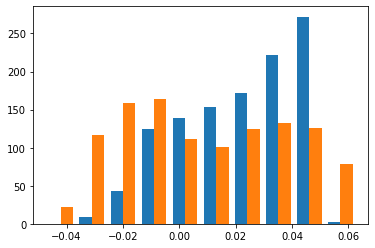

In [98]:
## LOADINGS PLOT OF PCA
plt.hist(pca.components_.T)

In [99]:
pca.explained_variance_

array([336.62610657, 230.25616134])

(array([ 12.,  35.,  79., 123., 106., 113., 130., 152., 241., 145.]),
 array([-0.59696445, -0.44064972, -0.284335  , -0.12802028,  0.02829445,
         0.18460917,  0.3409239 ,  0.49723862,  0.65355335,  0.80986807,
         0.9661828 ]),
 <BarContainer object of 10 artists>)

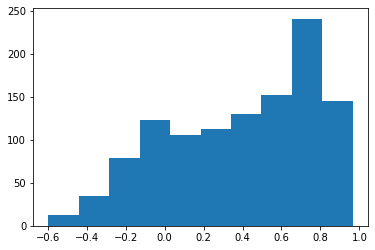

In [100]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.hist(loadings[:, 0])